First, import a few things we need:

In [2]:
%matplotlib inline
# Plot everything as SVG
%config InlineBackend.figure_formats=['svg']

# Hide warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for 3d plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Config styling
palette = ['#386DF9', '#FFDC52', '#FF1614', '#62F591', '#AA22FF', '#34495E']
muted = '#dcdce6'
sns.set(font='Calibre', font_scale=1.1, style='darkgrid', palette=palette, context='talk')

Define a few functions to be used throughout:

In [3]:
# useful functions

def plot_line(m, b, frm=0, to=200):
    xs = np.linspace(frm, to, 500)
    ys = np.dot(xs[:,np.newaxis], [m]) + b
    plt.plot(xs, ys)
    plt.title('$y={}x + {}$'.format(m,b))

def loss_function(m, b, X, y):
    y_hat = m*X + b
    
    # root mean squared error
    return np.sqrt(np.sum((y_hat - y)**2)/len(X))

def gen_data(m, b):
    X = np.linspace(50,150,100)

    # true function, with some noise
    y = m * X + np.random.normal(0, 12, X.shape[0]) + b
    return X, y

In [7]:
# for fixing matplotlib's svg clipping
from lxml import etree

def save(name):
    fname = '/home/ftseng/Downloads/{}.svg'.format(name)
    plt.savefig(fname)
    
    # edit the resulting svg to fix clipping issues
    # see <https://github.com/matplotlib/matplotlib/issues/2277>
    with open(fname, 'r') as f:
        raw = f.read()
    svg = etree.fromstring(raw.encode('utf-8'))
    
    # the last <defs> tag contains the clipping info
    defs = [c for c in svg.getchildren() if c.tag == '{http://www.w3.org/2000/svg}defs'][-1]
    
    # move it to the beginning
    svg.insert(0, defs)
    
    # re-write the svg
    with open(fname, 'w') as f:
        raw = etree.tostring(svg, pretty_print=True).decode('utf-8')
        f.write(raw)

Now, generate some data to work with:

How do we find a line that "fits" this data well?

We can try a few different values of $m$ and $b$ and see if it looks good.

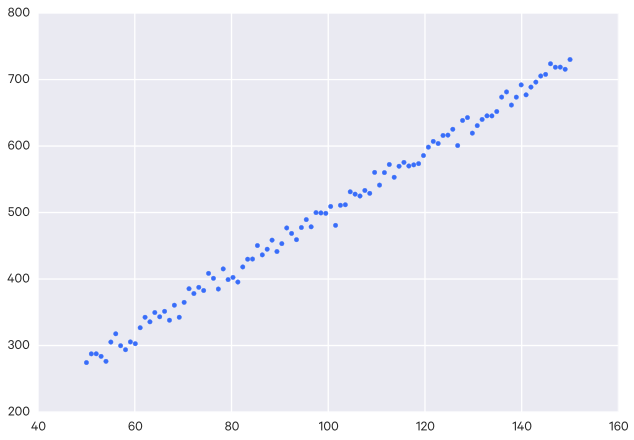

In [4]:
true_m = 4.5
true_b = 50

X, y = gen_data(true_m, true_b)
plt.scatter(X, y, color=palette[0])

#save('ml101_data')

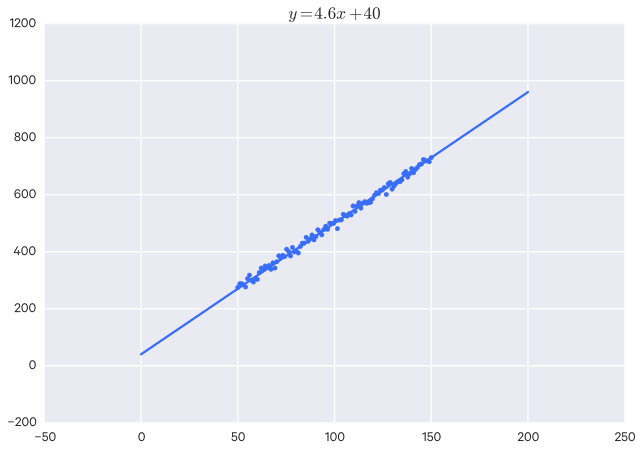

In [14]:
# plot the original data for comparison
plt.scatter(X, y, color=palette[0])

m = 4.6
b = 40
plot_line(m, b)

save('ml101_line03')

As people we can eyeball whether or not a line looks like a good fit. But a computer can't do that - we have to be explicit and quantify how good of a fit a line is.

We can do this by defining a "loss function", sometimes called a "cost function", which is some way we think quantifies the wrongness of a line.

A common approach is to look at an average of how far each data point is from the line we guessed.

Loss for m=10, b=2: 526.031841826


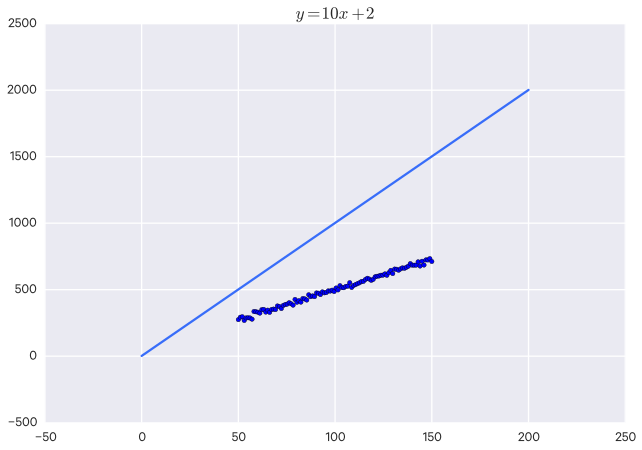

In [25]:
# plot the original data for comparison
plt.scatter(X, y)

m = 10
b = 2
plot_line(m, b)

print('Loss for m={}, b={}:'.format(m, b), loss_function(m, b, X, y))

When we wanted to find good values for $m$ and $b$, how did we do it?

We picked some random values to start with, then changed them and looked at the resulting line. If the line looked better, but was still off, we might keep changing the values in the same way (e.g. if we decreased $m$, we might try decreasing it more).

How can a computer be told to take a similar approach?

First, let's assume we already know the true value for $b$ and we just need to find a good value for $m$.

A good place to start is by asking: what's the relationship between values of $m$ and the loss function?

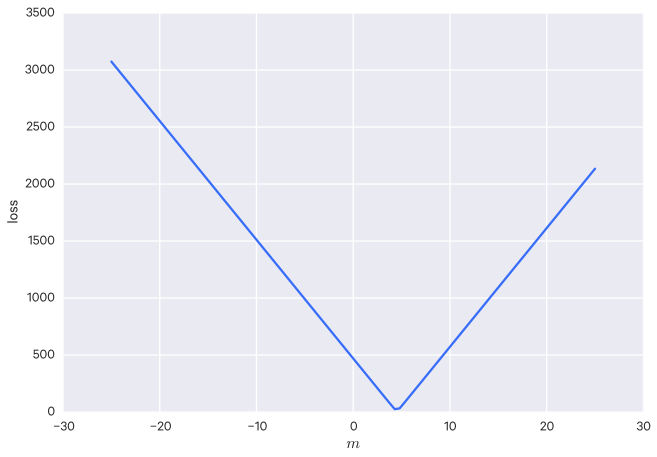

In [27]:
# fix b, assume we know the true value
b = true_b

ms = np.linspace(-25,25,100)
losses = []
for m in ms:
    losses.append(loss_function(m, b, X, y))
plt.plot(ms, losses)
plt.xlabel('$m$')
plt.ylabel('loss')

It looks clear that there is a value of $m$ where the loss is very low, almost 0. Since we can't have a negative loss, this value is the minimum of the loss function.

Again, this is pretty easy for us to eyeball, but how can a computer find this?

Maybe you remember calculus? You may have learned methods for identifying minima in functions.

Remember derivatives? A derivative a function describes how the output of the function changes with its inputs.

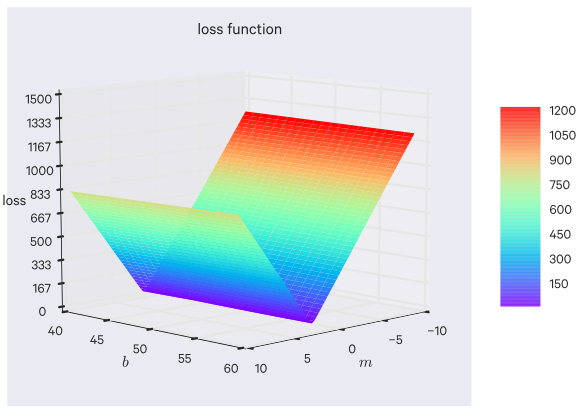

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ms = np.arange(-10,10, 0.25)
bs = np.arange(40,60, 1)
ms, bs = np.meshgrid(ms, bs)
Z = np.zeros(ms.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = loss_function(ms[i,j], bs[i,j], X, y)
surf = ax.plot_surface(ms, bs, Z, rstride=1, cstride=1, cmap=cm.rainbow,
        linewidth=0, antialiased=False)
ax.set_zlim(0, 1500)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.view_init(elev=10., azim=45)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('loss function')
ax.set_zlabel('loss')
ax.set_xlabel('$m$')
ax.set_ylabel('$b$')

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 3*(1-X)**2*np.exp(-X**2 - (Y+1)**2) - 10*(X/5 - X**3 - Y**5)*np.exp(-X**2-Y**2) - 1/3*np.exp(-(X+1)**2 - Y**2)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.rainbow,
        linewidth=0, antialiased=False)
ax.set_zlim(-10, 10)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('a peaks function')

In [ ]:
ms